In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
voxels_filepath = '/home/user/Documents/workspace/outputs/voxelstrace_case_3_1_6_keep_Jul_18_2020_18:55:01.csv'
memory_filepath = '/home/user/Documents/workspace/outputs/memorytrace_case_3_1_6_keep_Jul_18_2020_18:55:01.csv'

In [3]:
vox_data = pd.read_csv(voxels_filepath)
vox_data.head()

,nb_voxels
0,274400000
1,0
2,274400000
3,0
4,274400000


In [4]:
print(len(vox_data.index))

20


In [5]:
vox_data = vox_data.apply(lambda x: x*2/1000000, axis=1)
vox_data.head(15)

,nb_voxels
0,548.8
1,0.0
2,548.8
3,0.0
4,548.8
5,0.0
6,548.8
7,0.0
8,548.8
9,0.0


In [6]:
mem_data = pd.read_csv(memory_filepath)
mem_data.head()

,ram,swap
0,3490.953125,7.25
1,3500.117188,7.25
2,3850.554688,7.25
3,3923.101562,7.25
4,4010.792969,7.25


In [7]:
mem_data = mem_data.apply(np.round, axis=1)
mem_data.head()

,ram,swap
0,3491.0,7.0
1,3500.0,7.0
2,3851.0,7.0
3,3923.0,7.0
4,4011.0,7.0


In [8]:
start_ram = mem_data.iloc[0][0]
mem_data['ram'] = mem_data['ram'].apply(lambda x: x - start_ram)
mem_data.head()

,ram,swap
0,0.0,7.0
1,9.0,7.0
2,360.0,7.0
3,432.0,7.0
4,520.0,7.0


[Text(0, 0.5, 'RAM used (MB)'), Text(0.5, 0, 'time (5s interval)')]

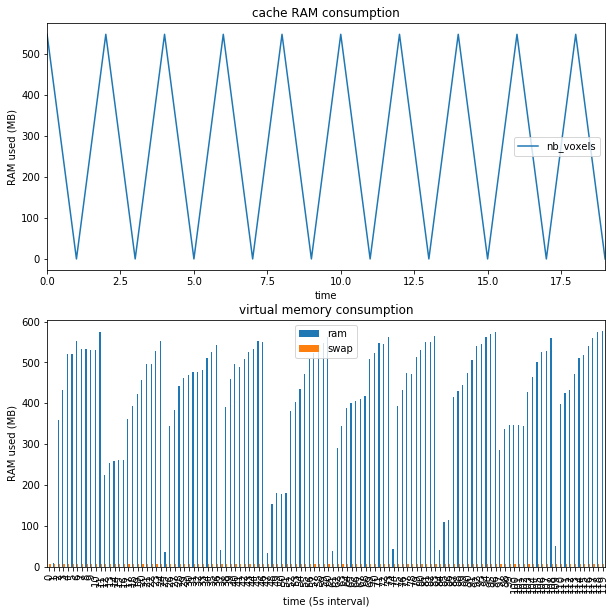

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)
plt.subplot(2,1,1)
vox_data.plot(title='cache RAM consumption', ax=plt.gca())
plt.gca().set(xlabel='time', ylabel='RAM used (MB)')
mem_data.plot(title='virtual memory consumption', ax=axes[1], kind='bar')
axes[1].set(xlabel='time (5s interval)', ylabel='RAM used (MB)')